In [279]:
import numpy as np
import matplotlib.pyplot as plt

In [317]:
data = np.loadtxt('data/ex1data1.txt',  delimiter=","); data.shape

(97, 2)

In [318]:
X = data[:,:data.shape[1] - 1]; X.shape

(97, 1)

In [319]:
y = data[:,data.shape[1] - 1:]; y.shape

(97, 1)

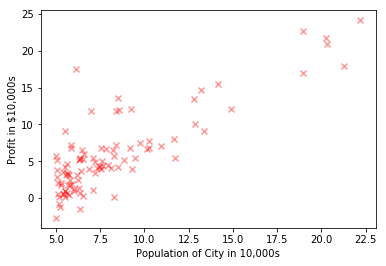

In [320]:
#  scatter plot reference: https://plot.ly/matplotlib/scatter/
plt.scatter(X,y, color='r', marker='x', alpha=.4)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

In [328]:
def addOnes(X):
    m = X.shape[0]
    ones = np.ones(m)
    onesX = np.column_stack((ones, X))
    return onesX

def computeCost(X, y, theta):
    m = X.shape[0]
    hypothesis = X.dot(theta)
    J = np.sum(np.square(hypothesis - y)) / (2 * m)
    return J

def computeCost2(X, y, theta0, theta1):
    m = X.shape[0]
    J = np.zeros((theta0.size, theta1.size))
    for i in range(theta0.size):
        for j in range(theta1.size):
            theta = np.array([[theta0[i]], [theta1[j]]])
            J[i,j] = computeCost(X, y, theta)
    return J

def gradient_descent(X, y,alpha = 0.01, numIter = 1500):
    m = X.shape[0]
    n = X.shape[1]
    theta = np.zeros((n, 1))
    J = np.zeros(numIter)
    for i in range(0, numIter):
        hypothesis = X.dot(theta)
        gradient =  X.T @ (X.dot(theta) - y) / m
        loss = hypothesis - y
        J[i] = np.sum(loss ** 2) / (2 * m)
        theta = theta - alpha * gradient
    return (theta, J)


In [344]:
a = np.array([[5, 1, 3],
       [1, 1, 1],
       [1, 2, 1]])
print(addOnes(a))  #addOnes(X).shape
theta_test = np.array([[0],[0]])
cost1 = computeCost(XX, y, theta_test)
print(cost1)

cost2 = computeCost2(XX, y, np.array([0]), np.array([0]))
print(cost2)  # expected cost1 = cost2

[[ 1.  5.  1.  3.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  2.  1.]]
32.0727338775
[[ 32.07273388]]


[[-3.63029144]
 [ 1.16636235]]


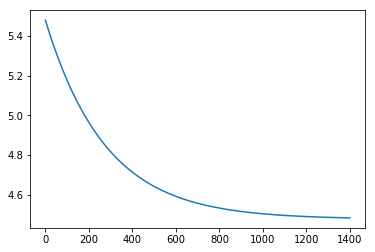

In [330]:

X_test = np.array([[1, 1], [1, 2], [1, 3]])
y_test = np.array([1,3,3])
(theta, J) = gradient_descent(X_test, y_test)
(theta, J) = gradient_descent(XX, y) ;  print(theta)  #print((theta))  expected value :   -3.6303  1.1664
plt.plot(J[100:])
plt.show()

In [331]:
XX = addOnes(X)
computeCost(XX, y,initial_theta) # expected value : 32.07...
#initial_theta.shape

32.072733877455676

In [332]:
(theta, _) = gradient_descent(XX, y); print(theta)
cost = computeCost(XX, y, theta); print(cost)

[[-3.63029144]
 [ 1.16636235]]
4.48338825659


In [334]:
x_lin = np.linspace(np.min(X) - 6, np.max(X) + 1, 100); x_lin.shape
addOnes(x_lin).shape

(100, 2)

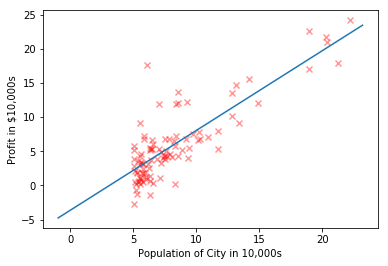

In [335]:
plt.scatter(X,y, color='r', marker='x', alpha=.4)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.plot(x_lin, addOnes(x_lin).dot(theta))
plt.show()

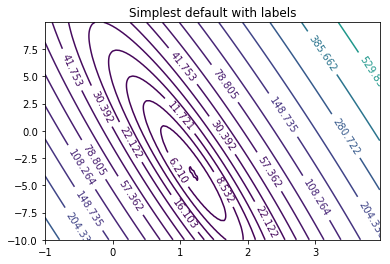

In [345]:
delta = 0.05
theta0 = np.arange(-1.0, 4.0, delta)
theta1 = np.arange(-10.0, 10.0, delta)

#theta = np.column_stack((x, y)); theta.shape
J = computeCost2(XX, y, theta1, theta0); J.shape
plt.figure()
levels = np.logspace(-1, 3, 30)   # this doesn't work. why?
CS = plt.contour(theta0, theta1, J, levels=levels)

plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')

plt.show()